<a href="https://colab.research.google.com/github/arkadijshmelev/Fight_against_poverty/blob/master/7_Fight_against_poverty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Данные

In [121]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [122]:
# Загрузим данные с google drive.
data = drive.CreateFile({'id': '1agp85kTjjaGobWDX0cAy3cSOGWdPTqNS'})
data.GetContentFile('Country_data.csv')

In [123]:
# Загрузжаем данные.
df = pd.read_csv('Country_data.csv')
# Выведем для просмотра.
display(df.head())
# Выведем информацию.
print(df.info())

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [124]:
print('Максимальное значение показателя средней продолжительности жизни среди представленных стран', round(df['life_expec'].max(), 1), 'года.')

Максимальное значение показателя средней продолжительности жизни среди представленных стран 82.8 года.


# Признаки

- country — название страны;
- child_mort — показатель смертности детей до 5 лет;
- exports — показатель экспорта на душу населения;
- health — показатель затрат на здравоохранение на душу населения;
- imports — показатель импорта на душу населения;
- Income — средний доход на душу населения;
- Inflation — годовой показатель инфляции;
- life_expec — средняя продолжительность жизни;
- total_fer — суммарный коэффициент рождаемости;
- gdpp — значение ВВП на душу населения.

# Стандартизация данных

In [125]:
# Разделим данные на тренировочную и тестовую выборки.
X = df.drop('country', axis=1)
y = df['country']

In [126]:
# Создадим объект класса StandardScaler().
scaler = StandardScaler()
# Применим ко всем значениям.
X_scaled = scaler.fit_transform(X)

# Корреляция

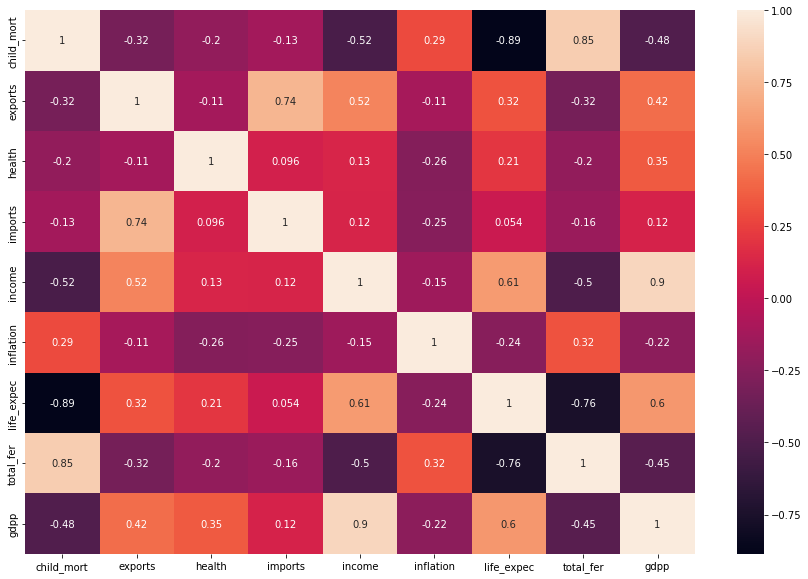

In [127]:
# Формируем датафрейм.
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
# Задаем параметры фигуры.
plt.figure(figsize = (15,10)) 
# Визуализируем матрицу корреляций.
sns.heatmap(X_scaled_df.corr(), annot=True);

# Понижение размерности данных - PCA

In [128]:
# Найдем минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.
pca = PCA(n_components=0.9, random_state=42).fit(X_scaled)
print('Минимальное число компонент -', len(pca.components_))

Минимальное число компонент - 5


In [129]:
print('Первая главная компонента среди главных компонент объясняет долю дисперсии равной -', round(pca.explained_variance_ratio_[0], 2))

Первая главная компонента среди главных компонент объясняет долю дисперсии равной - 0.46


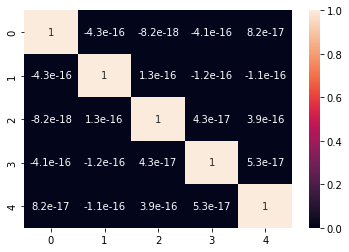

In [130]:
# Визуализируем матрицу корреляций.
X_pca = pca.fit_transform(X_scaled)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True);

# Коэффициент силуэта

In [131]:
# Созтавим список значений количества кластеров.
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# В цикле переберем значения из списка.
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(i, silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 0.3044199499231819
3 0.30797697865190166
4 0.3219583760049839
5 0.2497954735801044
6 0.2557148132818498
7 0.2758360485001676


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 0.2683030816676857
9 0.2646173587562106


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 0.2433095017766679


Исходя из полученного результата, лучше взять 4 кластера.

# KMeans

In [132]:
# Создадим модель класса KMeans().
km_model = KMeans(n_clusters=4, random_state=1, )
# Обучим модель.
km_model.fit(X_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

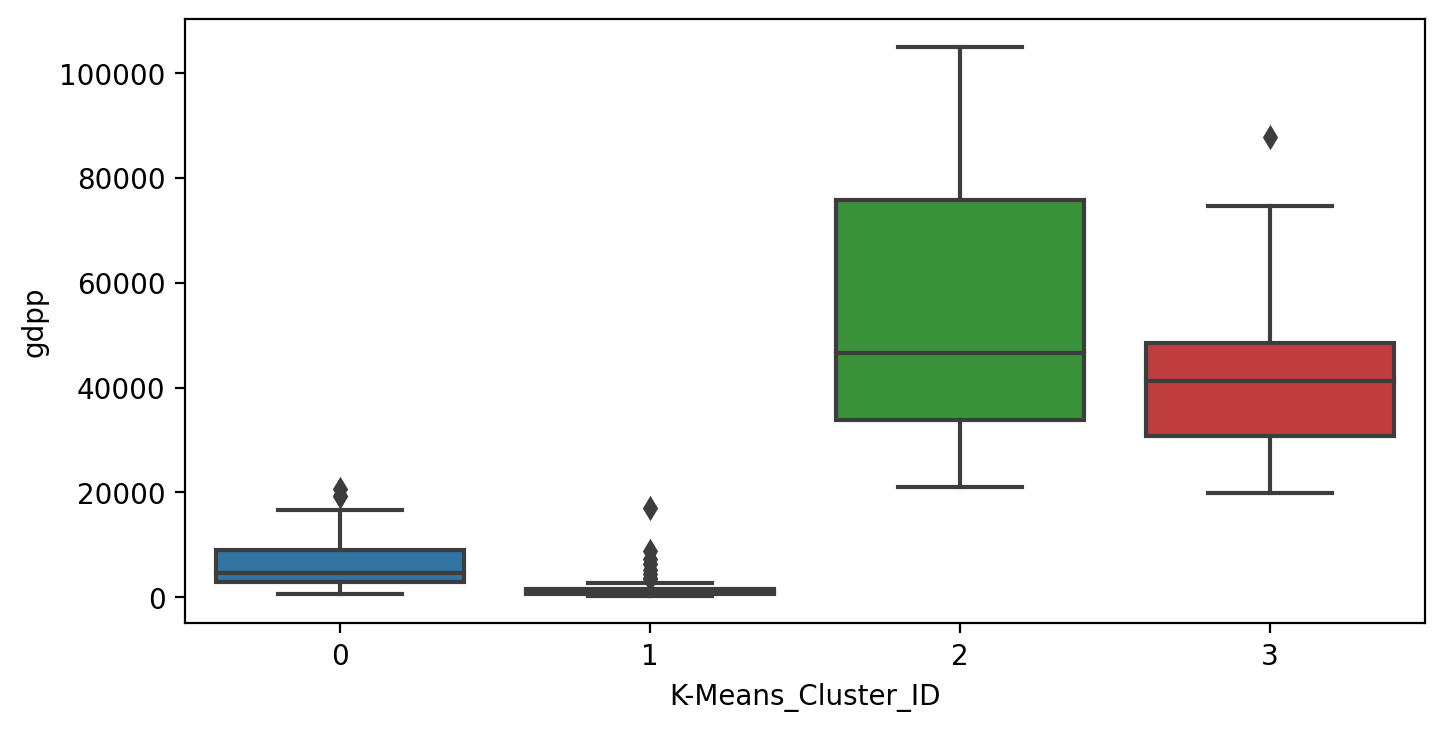

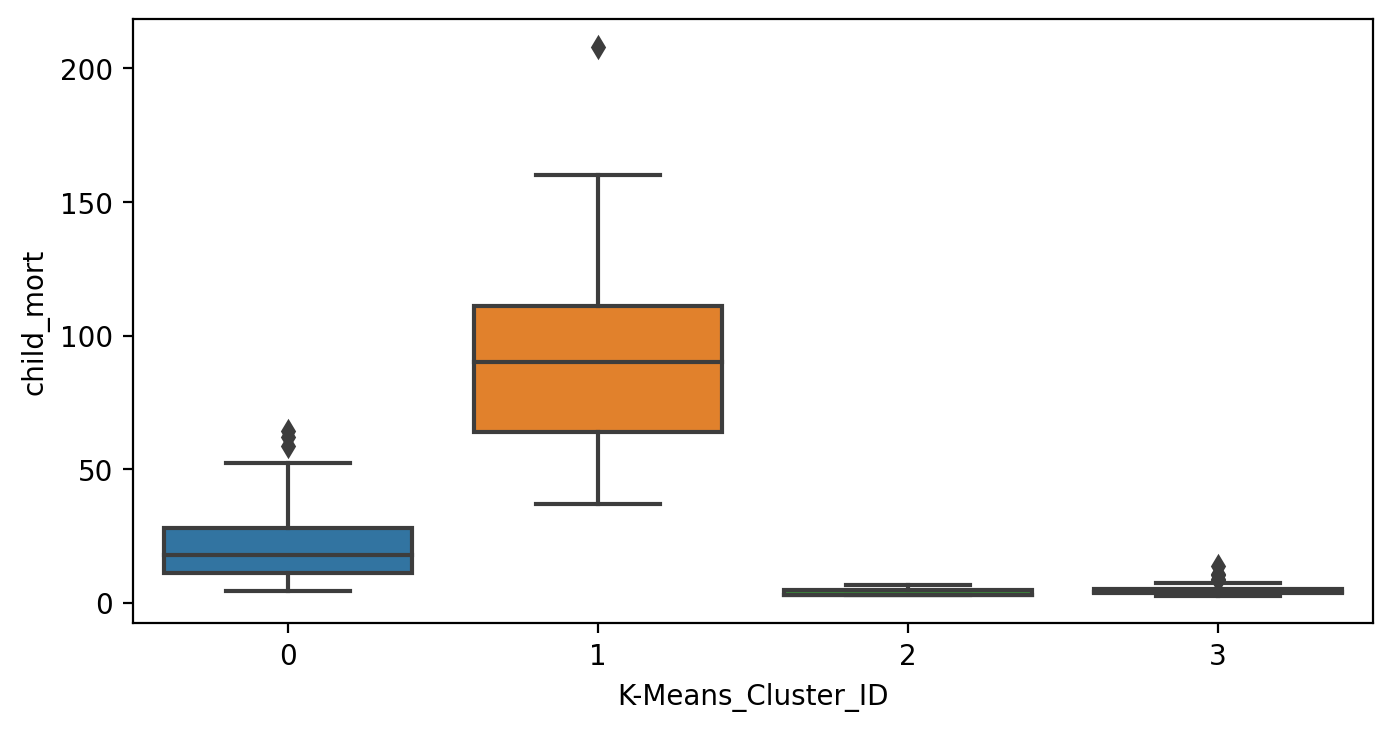

In [133]:
# Построим визуализацию кластеров по показателю детской смертности и ВВП.
df['K-Means_Cluster_ID'] = km_model.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df)

В кластер №1 попали страны с самой высокой детской смертностью и низким ВВП.

In [134]:
# Построим таблицу стран, из первого кластера и отсортируем по продолжительности жизни.
K_Means_countries = df[df['K-Means_Cluster_ID'] == 1]
K_Means_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,1
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
166,Zambia,83.1,37.00,5.89,30.9,3280,14.000,52.0,5.40,1460,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,1
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
